In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

2552


In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'mouse_long_5kb')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
else:
    print(f"Use library_folder: {library_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain
Use library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_long_5kb


## 3.1 design readout mapping dict (region_to_readout)

idea for this library:

> 1. each gene has 3 on-bits from 20 total-bits

> 2. split this entire region into 20 sets:

>> 2.1 first 10 sets are for first half of regions

In [3]:
from ImageAnalysis3.library_tools import encoding

In [4]:
on_num = 3
total_num = 19

encoding_file = os.path.join(library_folder, f'covering_v_{total_num}_k_{on_num}_t_2.txt')
loaded_bits = []

with open(encoding_file, 'r') as _handle:
    # start reading
    _lines = _handle.read().split('\n')
    for _line in _lines:
        _bits = [int(_i)-1 for _i in _line.split(' ') if len(_i) > 0]
        loaded_bits.append(_bits)

loaded_bits = np.array(loaded_bits, dtype=np.int32)
print(np.shape(loaded_bits))

# remove redundant bits
kept_bits = loaded_bits.copy()
kept_inds = np.zeros(len(kept_bits))
while np.sum(kept_inds) != len(kept_inds):
    kept_inds = np.ones(len(kept_bits), dtype=bool)
    _kept_mat = encoding.convert_bits_to_matrix(kept_bits)
    _dists = (total_num - (_kept_mat @ _kept_mat.T)) / 2
    _x, _y = np.where((_dists > 0) * (_dists <= 3))
    if len(_x) > 0:
        kept_inds[_x[0]] = False
        kept_bits = kept_bits[kept_inds]
        print(np.sum(kept_inds), kept_inds[_x[0]])
print(kept_bits.shape)

(57, 3)
(57, 3)


In [9]:
encoding_bits = kept_bits.copy()
encoding_mat = encoding.convert_bits_to_matrix(encoding_bits)

In [10]:
encoding_folder = os.path.join(library_folder, 'Encoding_design')
if not os.path.exists(encoding_folder):
    os.makedirs(encoding_folder)
    print(encoding_folder)

pickle.dump(encoding_bits, open(os.path.join(encoding_folder, f'encoding_bits_total-{total_num}_on-{on_num}'), 'wb'))

In [11]:
chr_2_region_num = pickle.load( open(os.path.join(library_folder, 'chr_2_final_region_num.pkl'), 'rb'))
chr_2_region_num

{'7': 1097}

In [12]:
# 1. split this region into half
half_region_num = int(np.ceil(chr_2_region_num['7']/2))
print(half_region_num)
half_group_num = 10
print(half_group_num)
group_rids = [np.arange(_i, half_region_num, half_group_num) for _i in range(half_group_num)]
group_rids += [np.arange(half_region_num+_i, chr_2_region_num['7'], half_group_num) for _i in range(half_group_num)]

549
10


In [13]:
group_rids

[array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540]),
 array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
        131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
        261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
        391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
        521, 531, 541]),
 array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
        132, 142, 152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252,
        262, 272, 282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382,
        392, 402, 412, 422, 432, 442, 452, 462, 472, 482, 492, 502, 512,
        522, 532, 542]),
 array([  3,  13,  23,  33,  43,  53,  63,  73,  

array([54, 55])

In [25]:
np.unique(np.concatenate(group_rids))

(1097,)

In [37]:
np.unique(cand_codes, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       dtype=int64))

18

In [70]:
# 2. optimize order within each set
np.random.seed(0)
gsize_2_codes = {}
gsize_2_bit_usage = {}
for _size in np.unique([len(_g) for _g in group_rids]):
    print(f"group size: {_size}")
    # init candidate codes
    cand_codes = list(encoding_bits.copy())
    # init gsize_2_codes as final output
    gsize_2_codes[_size] = []
    # try to assign as even as possible for this group
    _group_bit_usage = np.zeros(np.max(cand_codes) + 1)
    
    while len(gsize_2_codes[_size]) < _size:
        # for each cand_code, estimate overlap
        _cand_code_bit_usage = [np.sum(_group_bit_usage[_code]**2) for _code in cand_codes]
        # find the least overlapping candidate
        _least_overlap_inds = []
        _usage_th = np.min(_cand_code_bit_usage)
        while len(_least_overlap_inds) == 0:
            _least_overlap_inds = np.where(np.array(_cand_code_bit_usage)<=_usage_th)[0]
            _usage_th += 1
        # randomly select one among the least overlapping codes
        _rand_least_overlap_ind = _least_overlap_inds[np.random.randint(len(_least_overlap_inds))]
        # remove this code from cand_bit pool
        _sel_cand = cand_codes.pop(_rand_least_overlap_ind)
        # update final list
        gsize_2_codes[_size].append(_sel_cand)
        # update local group bit usage
        _group_bit_usage[_sel_cand] += 1
        print(f"{np.max(_group_bit_usage)}, {_sel_cand}")
    # save bit_usage
    gsize_2_bit_usage[_size] = _group_bit_usage

group size: 54
1.0, [ 5  8 17]
1.0, [ 2  6 11]
1.0, [0 1 3]
1.0, [10 12 18]
1.0, [ 7  9 14]
2.0, [ 4 10 13]
2.0, [ 2 15 16]
2.0, [ 0 12 16]
2.0, [3 5 6]
2.0, [ 8 14 15]
2.0, [ 4  9 18]
2.0, [ 1 13 17]
3.0, [ 7 11 17]
3.0, [0 8 9]
3.0, [ 1  6 14]
3.0, [ 7 10 16]
3.0, [ 3 12 15]
3.0, [ 5 11 18]
4.0, [1 2 4]
4.0, [ 2  7 13]
4.0, [ 9 12 17]
4.0, [ 4 11 14]
4.0, [ 6  8 18]
4.0, [ 0  5 13]
5.0, [ 5 10 15]
5.0, [ 3  4 16]
5.0, [ 3  8 11]
5.0, [ 2 12 14]
5.0, [ 1  9 10]
5.0, [ 6 13 15]
5.0, [16 17 18]
6.0, [ 0  7 15]
6.0, [ 2  3 17]
6.0, [ 5 14 16]
6.0, [ 6  7 12]
6.0, [ 0 10 11]
7.0, [ 3  9 13]
7.0, [ 1 15 18]
7.0, [4 7 8]
7.0, [ 1 11 12]
7.0, [0 4 6]
7.0, [ 2  8 10]
7.0, [13 14 18]
8.0, [ 6  9 16]
8.0, [ 0 14 17]
8.0, [ 4  5 12]
8.0, [ 1  8 16]
8.0, [ 9 11 15]
8.0, [ 3  7 18]
9.0, [ 6 10 17]
9.0, [2 5 9]
9.0, [ 8 12 13]
9.0, [ 3 10 14]
9.0, [ 4 15 17]
group size: 55
1.0, [0 1 3]
1.0, [ 2 15 16]
1.0, [ 9 12 17]
1.0, [ 4 10 13]
1.0, [ 6  8 18]
2.0, [ 4 11 14]
2.0, [1 5 7]
2.0, [ 7 11 17]
2.0, 

In [85]:
reload(ia.library_tools.encoding)

<module 'ImageAnalysis3.library_tools.encoding' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\encoding.py'>

In [97]:
from tqdm import tqdm

In [111]:
np.where(_dists == np.nanmax(_dists))[0]

array([ 4,  5,  9, 10, 15, 22, 23, 27, 30, 31, 35, 40, 47, 48],
      dtype=int64)

4

In [172]:
sorted_gsize_2_codes = {}
sorted_gsize_2_dists = {}
for _size, _codes in gsize_2_codes.items():
    print(f"group size: {_size}")
    _code_degrees = np.array([np.sum(gsize_2_bit_usage[_size][_code]) for _code in _codes])
    final_sorted_codes = []
    # try random sorting for many times
    final_dists = [0,0]
    for _iter in tqdm(range(2000)):
        # set random seed
        #np.random.seed(_iter*1001)
        _sorted_codes = []
        # select from small to large degreed codes
        for _degree in np.unique(_code_degrees):
            _cand_codes = [tuple(_c) for _c in np.array(_codes)[np.where(_code_degrees==_degree)[0]]]
            # shuffle candidate codes
            np.random.shuffle(_cand_codes)
            # within these candidate codes, insert to the best place
            for _code in _cand_codes:
                _dists = [encoding.calculate_closest_overlap(_sorted_codes, _code, _loc)
                          for _loc in range(0, len(_sorted_codes)+1)]
                # randomly select one of the smallest dist location insert:
                _sel_ind = np.random.choice(np.where(_dists == np.nanmax(_dists))[0])
                _sorted_codes.insert(_sel_ind, _code)
                #print(_dists, np.max(_dists), np.argmax(_dists))
        # given this order, check the internal distances
        _sorted_dists = []
        for _i, _code in enumerate(_sorted_codes):
            _other_codes = [_c for _j, _c in enumerate(_sorted_codes) if _i != _j]
            _sorted_dists.append(encoding.calculate_closest_overlap(_other_codes, _code, _i))
        if np.nanmin(_sorted_dists) > np.nanmin(final_dists) \
        or ( (np.nanmin(_sorted_dists) == np.nanmin(final_dists)) \
            and (np.nanmean(_sorted_dists) > np.nanmean(final_dists)) ):
            final_dists = np.array(_sorted_dists)
            final_codes = [np.array(_c) for _c in _sorted_codes]
            print(f'Change in iter: {_iter}, min_dist={int(np.nanmin(final_dists))},  mean_dist={np.nanmean(final_dists):.2f}')
    # save
    sorted_gsize_2_codes[_size] = final_codes
    sorted_gsize_2_dists[_size] = final_dists

group size: 54


  0%|                                                                              | 1/2000 [00:00<04:50,  6.89it/s]

Change in iter: 0, min_dist=2,  mean_dist=3.52


  0%|▏                                                                             | 4/2000 [00:00<04:49,  6.90it/s]

Change in iter: 2, min_dist=2,  mean_dist=3.61


  0%|▏                                                                             | 6/2000 [00:00<04:49,  6.89it/s]

Change in iter: 4, min_dist=2,  mean_dist=3.78
Change in iter: 5, min_dist=3,  mean_dist=3.63


  1%|▍                                                                            | 11/2000 [00:01<04:48,  6.90it/s]

Change in iter: 9, min_dist=3,  mean_dist=3.65


  1%|▌                                                                            | 15/2000 [00:02<04:47,  6.90it/s]

Change in iter: 13, min_dist=3,  mean_dist=3.96


100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [04:48<00:00,  6.93it/s]


group size: 55


  0%|                                                                              | 1/2000 [00:00<05:02,  6.62it/s]

Change in iter: 0, min_dist=3,  mean_dist=3.65


  1%|▍                                                                            | 12/2000 [00:01<04:58,  6.65it/s]

Change in iter: 10, min_dist=3,  mean_dist=3.69


  2%|█▍                                                                           | 38/2000 [00:05<04:54,  6.66it/s]

Change in iter: 36, min_dist=3,  mean_dist=3.82


  6%|████▍                                                                       | 117/2000 [00:17<04:43,  6.65it/s]

Change in iter: 115, min_dist=3,  mean_dist=3.93


 80%|███████████████████████████████████████████████████████████▉               | 1599/2000 [04:00<01:00,  6.62it/s]

Change in iter: 1597, min_dist=3,  mean_dist=3.96


100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [05:00<00:00,  6.65it/s]


## Assemble based on groups

loop through groups and assign bits

In [173]:
rid_2_code = {}
for _ig, _rids in enumerate(group_rids):
    _size = len(_rids)
    _group_codes = sorted_gsize_2_codes[_size]
    for _rid, _code in zip(_rids, _group_codes):
        _full_code = _code + _ig * total_num
        #print(_rid, _code, _full_code)
        rid_2_code[_rid] = _full_code
    #break
rid_2_code = {_k:rid_2_code[_k] for _k in sorted(rid_2_code)}

In [174]:
# calculate the final code gdists
total_codes = list(rid_2_code.values())
total_dists = []
for _i, _code in enumerate(total_codes):
    total_dists.append(
        encoding.calculate_closest_overlap([_c for _j, _c in enumerate(total_codes) if _i != _j], 
                                           _code, _i)
    )

In [178]:
np.where(np.array(total_codes)==7)

(array([ 40, 130, 230, 270, 300, 370, 420, 470], dtype=int64),
 array([1, 1, 1, 0, 1, 0, 2, 0], dtype=int64))

<IPython.core.display.Javascript object>


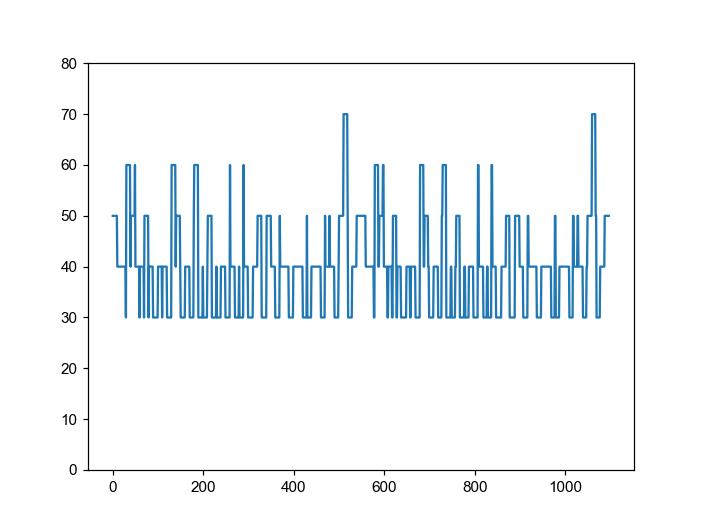

(0.0, 80.0)

In [182]:
plt.figure()
plt.plot(total_dists)
plt.ylim([0,80])

# region to bits

In [6]:
# load
chr_2_region_names = pickle.load(open(os.path.join(library_folder,'chr_2_region_names.pkl'), 'rb'))

In [7]:
chr_2_region_names

{'7': ['Chr7-6Mb-seg-1',
  'Chr7-6Mb-seg-2',
  'Chr7-6Mb-seg-3',
  'Chr7-6Mb-seg-4',
  'Chr7-6Mb-seg-7',
  'Chr7-6Mb-seg-9',
  'Chr7-6Mb-seg-10',
  'Chr7-6Mb-seg-11',
  'Chr7-6Mb-seg-12',
  'Chr7-6Mb-seg-14',
  'Chr7-6Mb-seg-15',
  'Chr7-6Mb-seg-16',
  'Chr7-6Mb-seg-19',
  'Chr7-6Mb-seg-20',
  'Chr7-6Mb-seg-21',
  'Chr7-6Mb-seg-22',
  'Chr7-6Mb-seg-23',
  'Chr7-6Mb-seg-24',
  'Chr7-6Mb-seg-25',
  'Chr7-6Mb-seg-27',
  'Chr7-6Mb-seg-28',
  'Chr7-6Mb-seg-29',
  'Chr7-6Mb-seg-36',
  'Chr7-6Mb-seg-38',
  'Chr7-6Mb-seg-39',
  'Chr7-6Mb-seg-40',
  'Chr7-6Mb-seg-41',
  'Chr7-6Mb-seg-42',
  'Chr7-6Mb-seg-43',
  'Chr7-6Mb-seg-44',
  'Chr7-6Mb-seg-45',
  'Chr7-6Mb-seg-46',
  'Chr7-6Mb-seg-47',
  'Chr7-6Mb-seg-48',
  'Chr7-6Mb-seg-49',
  'Chr7-6Mb-seg-50',
  'Chr7-6Mb-seg-51',
  'Chr7-6Mb-seg-52',
  'Chr7-6Mb-seg-53',
  'Chr7-6Mb-seg-54',
  'Chr7-6Mb-seg-55',
  'Chr7-6Mb-seg-56',
  'Chr7-6Mb-seg-57',
  'Chr7-6Mb-seg-58',
  'Chr7-6Mb-seg-59',
  'Chr7-6Mb-seg-60',
  'Chr7-6Mb-seg-61',
  'Chr7-6Mb-se

In [16]:
region_2_group_id = {}
for _group, _rids in enumerate(group_rids):
    for _rid in _rids:
        _region = chr_2_region_names['7'][_rid]
        region_2_group_id[_region] = _group
region_2_group_id = {_n:_g for _n, _g in sorted(region_2_group_id.items(), key=lambda v:int(v[0].split('seg-')[-1]))}

In [17]:
region_2_group_id

{'Chr7-6Mb-seg-1': 0,
 'Chr7-6Mb-seg-2': 1,
 'Chr7-6Mb-seg-3': 2,
 'Chr7-6Mb-seg-4': 3,
 'Chr7-6Mb-seg-7': 4,
 'Chr7-6Mb-seg-9': 5,
 'Chr7-6Mb-seg-10': 6,
 'Chr7-6Mb-seg-11': 7,
 'Chr7-6Mb-seg-12': 8,
 'Chr7-6Mb-seg-14': 9,
 'Chr7-6Mb-seg-15': 0,
 'Chr7-6Mb-seg-16': 1,
 'Chr7-6Mb-seg-19': 2,
 'Chr7-6Mb-seg-20': 3,
 'Chr7-6Mb-seg-21': 4,
 'Chr7-6Mb-seg-22': 5,
 'Chr7-6Mb-seg-23': 6,
 'Chr7-6Mb-seg-24': 7,
 'Chr7-6Mb-seg-25': 8,
 'Chr7-6Mb-seg-27': 9,
 'Chr7-6Mb-seg-28': 0,
 'Chr7-6Mb-seg-29': 1,
 'Chr7-6Mb-seg-36': 2,
 'Chr7-6Mb-seg-38': 3,
 'Chr7-6Mb-seg-39': 4,
 'Chr7-6Mb-seg-40': 5,
 'Chr7-6Mb-seg-41': 6,
 'Chr7-6Mb-seg-42': 7,
 'Chr7-6Mb-seg-43': 8,
 'Chr7-6Mb-seg-44': 9,
 'Chr7-6Mb-seg-45': 0,
 'Chr7-6Mb-seg-46': 1,
 'Chr7-6Mb-seg-47': 2,
 'Chr7-6Mb-seg-48': 3,
 'Chr7-6Mb-seg-49': 4,
 'Chr7-6Mb-seg-50': 5,
 'Chr7-6Mb-seg-51': 6,
 'Chr7-6Mb-seg-52': 7,
 'Chr7-6Mb-seg-53': 8,
 'Chr7-6Mb-seg-54': 9,
 'Chr7-6Mb-seg-55': 0,
 'Chr7-6Mb-seg-56': 1,
 'Chr7-6Mb-seg-57': 2,
 'Chr7-6Mb-seg-58

In [18]:
# save
pickle.dump(region_2_group_id, open(os.path.join(library_folder, 'region_2_group_id.pkl'), 'wb'))

In [8]:
len(chr_2_region_names['7'])

1097

In [199]:
# assemble to regionrate region_to_encoding_bits
region_2_bits = {}
for _rid, _rname in enumerate(chr_2_region_names['7']):
    region_2_bits[_rname] = rid_2_code[_rid]

In [200]:
print("saving")
pickle.dump(region_2_bits, open(os.path.join(encoding_folder, f'region_2_bits.pkl'), 'wb'))

saving


In [201]:
region_2_readout_dict = {}
for _iregion, _region in enumerate(region_2_bits):
    region_2_readout_dict[_region] = []#[f"u{_iregion}"]
    region_2_readout_dict[_region].extend([f"c{_b}" for _b in region_2_bits[_region]])

# save
pickle.dump(region_2_readout_dict, open(os.path.join(library_folder, 'region_2_readout.pkl'), 'wb'))